In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt

from abl.inflow.synthetic import TurbSim  # currently supported: TurbSim, GaborKS

# This notebook can be run from wherever you want boundaryData to be generated.

In [2]:
precdir = '/scratch/equon/precursors/neutral/8mps_rough0.15_6km_ds40'
bcname = 'west'
t0 = 50000.0 # end of precursor, beginning of finite-domain simulation
dt = 0.5 # fixed sampling period and finite-domain time-step size
ds = 10.0 # finite-domain resolution
domain_height = 1020.0
domain_width = 3000.0

# reference values
ustar = 0.423119
zhub = 90.0
Uhub = 8.0

# MMC params
#R13_ref = -ustar**2 # -4.50e-2 (from ds=20 case)
tanh_z50 = 625.0 # fluctuations from SGS KS constant up to z ~= 200
tanh_z90 = 645.0
tanh_z10 = tanh_z50 - (tanh_z90-tanh_z50)

# Read boundaryData from precursor

In [3]:
prec = np.load(os.path.join(precdir,'postProcessing','boundaryData',bcname,'data.npz'))
%time Uorig = np.copy(prec['U'])
%time Torig = np.copy(prec['T'])
%time korig = np.copy(prec['k'])

CPU times: user 37.9 s, sys: 2.94 s, total: 40.9 s
Wall time: 40.9 s
CPU times: user 6.95 s, sys: 778 ms, total: 7.73 s
Wall time: 7.73 s
CPU times: user 12.3 s, sys: 977 ms, total: 13.2 s
Wall time: 13.3 s


In [4]:
plane = np.load(os.path.join(precdir,'postProcessing','boundaryData',bcname,'points.npz'))
%time ycc = np.copy(plane['y'])
%time zcc = np.copy(plane['z'])
dy = ycc[1,0] - ycc[0,0]
dz = zcc[0,1] - zcc[0,0]

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 1.71 ms
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 1.3 ms


In [5]:
%time NT, NY, NZ, _ = Uorig.shape
print(NT,NY,NZ)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
7200 300 102


In [6]:
t = t0 + np.arange(1,NT)*dt

# Read fluctuating velocity fields from TurbSim

In [7]:
%time sim = TurbSim('/projects/windsim/precursors/turbsim/neutral/ieckai_10m_8mps_11.5TI/ieckai', verbose=True)

Reading header information from /projects/windsim/precursors/turbsim/neutral/ieckai_10m_8mps_11.5TI/ieckai.bts
  id= 8 (periodic)
  NumGrid_Z,_Y= 76 76
  ntower= 0
  nt= 1200
  (problem size: 20793600 points)
  dz,dy= 10.0 10.0
  TimeStep= 0.5
  Period= 600.0
  Umean = uhub = 8.0 (for calculating fluctuations)
  HubHt= 380.0  (NOT USED)
  Zbottom= 5.0
  Vslope= [  7492.80761719   9124.65136719  14390.578125  ]
  Vintercept= [-61518.875       1437.140625    -246.8203125]
b'This full-field file was generated by TurbSim (v2.00.07a-bjj, 14-Jun-2016) on 11-Mar-2018 at 03:59:55.'
Reading normalized grid data
  U size : 79.3212890625 MB
  Read velocitiy fields in 43.809999999999995 s
Calculating velocities from normalized data
  u min/max [ -4.16287 4.58352 ]
  v min/max [ -3.74865 3.43354 ]
  w min/max [ -2.25989 2.29413 ]
Calculating coordinates
Read times [ 0.0 0.5 ... 599.5 ]
CPU times: user 44 s, sys: 35 ms, total: 44 s
Wall time: 44.1 s


In [8]:
# calculate "grid" for plotting (TurbSim)
sim.xG, sim.yG, sim.zG = np.meshgrid(Uhub*sim.t,sim.y,sim.z,indexing='ij')

In [9]:
sim.xG.shape

(1200, 76, 76)

(0.0, 4796.0, 0.0, 750.0)

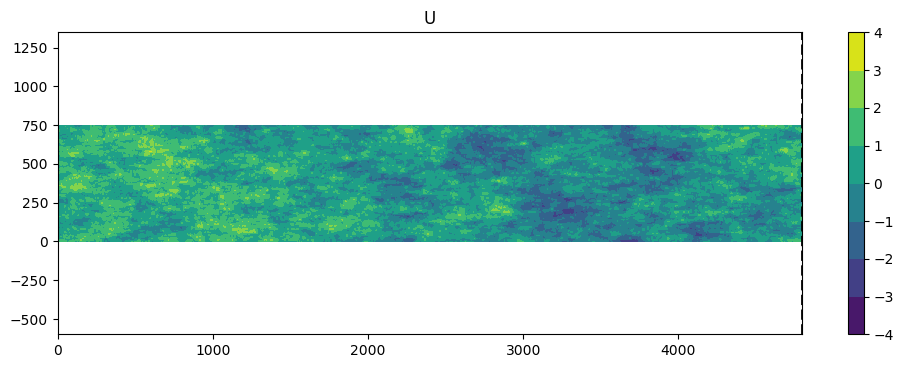

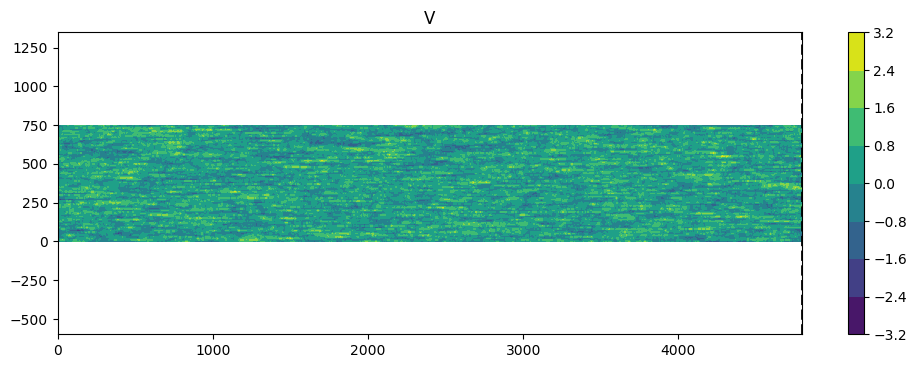

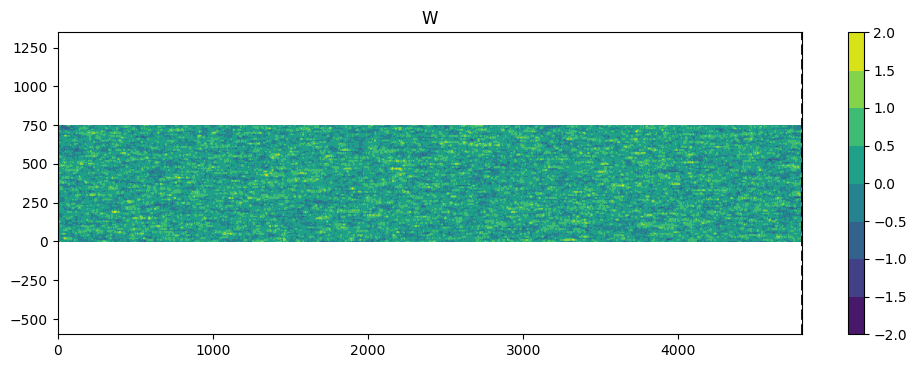

In [10]:
# plot horizontal slice of input field (t vs y)
zindex = 5
Tmax = None # 2000
period = np.max(sim.xG[:Tmax,:300,zindex])

fig,ax = plt.subplots(figsize=(12,4),dpi=100)
cnt = ax.contourf(sim.xG[:Tmax,:300,zindex], sim.yG[:Tmax,:300,zindex], sim.U[0,:Tmax,:300,zindex])
ax.axvline(period,color='k',lw=2,ls='--')
#cnt = ax.contourf(sim.xG[:Tmax,:300,zindex]+period, sim.yG[:Tmax,:300,zindex], sim.U[0,:Tmax,:300,zindex])
plt.colorbar(cnt)
ax.set_title('U')
plt.axis('equal')

fig,ax = plt.subplots(figsize=(12,4),dpi=100)
cnt = ax.contourf(sim.xG[:Tmax,:300,zindex], sim.yG[:Tmax,:300,zindex], sim.U[1,:Tmax,:300,zindex])
ax.axvline(period,color='k',lw=2,ls='--')
#cnt = ax.contourf(sim.xG[:Tmax,:300,zindex]+period, sim.yG[:Tmax,:300,zindex], sim.U[1,:Tmax,:300,zindex])
plt.colorbar(cnt)
ax.set_title('V')
plt.axis('equal')

fig,ax = plt.subplots(figsize=(12,4),dpi=100)
cnt = ax.contourf(sim.xG[:Tmax,:300,zindex], sim.yG[:Tmax,:300,zindex], sim.U[2,:Tmax,:300,zindex])
ax.axvline(period,color='k',lw=2,ls='--')
#cnt = ax.contourf(sim.xG[:Tmax,:300,zindex]+period, sim.yG[:Tmax,:300,zindex], sim.U[2,:Tmax,:300,zindex])
plt.colorbar(cnt)
ax.set_title('W')
plt.axis('equal')


In [11]:
# tile the domain (TurbSim only)
sim_width = np.max(sim.y) - np.min(sim.y)
ntiles = int(np.ceil(domain_width / sim_width))
print(ntiles,'tiles needed for simulated inflow plane width of',sim_width)
sim.tileY(ntiles=ntiles, mirror=True)

4 tiles needed for simulated inflow plane width of 750.0
Creating 4 horizontal tiles
  before: (3, 1200, 76, 76)
  after : (3, 1200, 301, 76)


In [12]:
# match sowfa inlet boundary
sim.resizeY(yMin=ds/2, yMax=domain_width-ds/2)
sim.resizeZ(zMin=ds/2, zMax=domain_height-ds/2)

Resizing fluctuations field in y-dir from [ 0.0 3000.0 ] to [ 5.0 2995.0 ]
  before: (3, 1200, 301, 76)
  after: (3, 1200, 300, 76)
Updating y coordinates
Resizing fluctuations field in z-dir from [ 5.0 755.0 ] to [ 5.0 1015.0 ]
  before: (3, 1200, 300, 76)
  after: (3, 1200, 300, 102)
Updating z coordinates
Resetting scaling function


In [13]:
# CHECK FOR DATA ALIGNMENT
checks = []
#checks.append(sim.NX >= NT)
checks.append(sim.NY >= NY)
checks.append(sim.NZ >= NZ)
checks.append(sim.dy == dy)
checks.append(sim.dz == dz)
checks.append(np.abs(sim.dt - dt) < 1e-8)
print(checks)

[True, True, True, True, True]


In [14]:
assert(all([stat==True for stat in checks]))

In [15]:
# ensure that we're using the exact dt we want
sim.dt = dt

In [16]:
sim.U.shape

(3, 1200, 300, 102)

Updated scaling range (dir=0) : 0.0 1.0
Updated scaling range (dir=1) : 0.0 1.0
Updated scaling range (dir=2) : 0.0 1.0


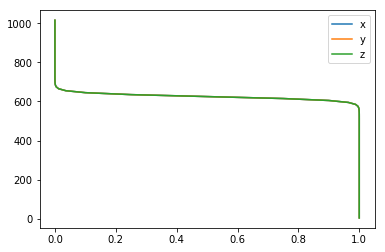

In [17]:
sim.set_scaling(
    tanh_z90=tanh_z90,
    tanh_z50=tanh_z50
)
plt.plot(sim.scaling[0,:],sim.z,label='x')
plt.plot(sim.scaling[1,:],sim.z,label='y')
plt.plot(sim.scaling[2,:],sim.z,label='z')
plt.legend(loc='best')

# GENERATE THE BOUNDARY DATA

In [18]:
# zero the inlet k
prec_mod = { 'U': Uorig, 'T': Torig, 'k': np.zeros(np.shape(Torig)) }

In [19]:
%time sim.write_sowfa_mapped_BC(outputdir='boundaryData',bcname='west',time_varying_input=prec_mod,ref_height=zhub,tstart=t0,periodic=True)

Writing boundaryData/west/points
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50000.5/U
Writing out boundaryData/west/50000.5/T
Writing out boundaryData/west/50000.5/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50001/U
Writing out boundaryData/west/50001/T
Writing out boundaryData/west/50001/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50001.5/U
Writing out boundaryData/west/50001.5/T
Writing out boundaryData/west/50001.5/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50002/U
Writing out boundaryData/west/50002/T
Writing out boundaryData/west/50002/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50002.5/U
Writing out boundaryData/west/50002.5/T
Writing out boundaryData/west/50002.5/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/5

Writing out boundaryData/west/50023.5/T
Writing out boundaryData/west/50023.5/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50024/U
Writing out boundaryData/west/50024/T
Writing out boundaryData/west/50024/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50024.5/U
Writing out boundaryData/west/50024.5/T
Writing out boundaryData/west/50024.5/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50025/U
Writing out boundaryData/west/50025/T
Writing out boundaryData/west/50025/k
Mean wind dir at 90.0 m is 270.0 deg, rotating by -0.0 deg
Writing out boundaryData/west/50025.5/U
Writing out boundaryData/west/50025.5/T
Writing out boundaryData/west/50025.5/k
Mean wind dir at 90.0 m is 270.0 deg, rotating by -0.0 deg
Writing out boundaryData/west/50026/U
Writing out boundaryData/west/50026/T
Writing out boundaryData/west/50026/k
Mean wind dir at 90.0 m is 270.0 deg, rotat

Writing out boundaryData/west/50047/T
Writing out boundaryData/west/50047/k
Mean wind dir at 90.0 m is 269.9 deg, rotating by 0.1 deg
Writing out boundaryData/west/50047.5/U
Writing out boundaryData/west/50047.5/T
Writing out boundaryData/west/50047.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50048/U
Writing out boundaryData/west/50048/T
Writing out boundaryData/west/50048/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50048.5/U
Writing out boundaryData/west/50048.5/T
Writing out boundaryData/west/50048.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50049/U
Writing out boundaryData/west/50049/T
Writing out boundaryData/west/50049/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50049.5/U
Writing out boundaryData/west/50049.5/T
Writing out boundaryData/west/50049.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating

Writing out boundaryData/west/50070.5/T
Writing out boundaryData/west/50070.5/k
Mean wind dir at 90.0 m is 268.6 deg, rotating by 1.4 deg
Writing out boundaryData/west/50071/U
Writing out boundaryData/west/50071/T
Writing out boundaryData/west/50071/k
Mean wind dir at 90.0 m is 268.6 deg, rotating by 1.4 deg
Writing out boundaryData/west/50071.5/U
Writing out boundaryData/west/50071.5/T
Writing out boundaryData/west/50071.5/k
Mean wind dir at 90.0 m is 268.7 deg, rotating by 1.3 deg
Writing out boundaryData/west/50072/U
Writing out boundaryData/west/50072/T
Writing out boundaryData/west/50072/k
Mean wind dir at 90.0 m is 268.7 deg, rotating by 1.3 deg
Writing out boundaryData/west/50072.5/U
Writing out boundaryData/west/50072.5/T
Writing out boundaryData/west/50072.5/k
Mean wind dir at 90.0 m is 268.7 deg, rotating by 1.3 deg
Writing out boundaryData/west/50073/U
Writing out boundaryData/west/50073/T
Writing out boundaryData/west/50073/k
Mean wind dir at 90.0 m is 268.7 deg, rotating b

Writing out boundaryData/west/50094/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50094.5/U
Writing out boundaryData/west/50094.5/T
Writing out boundaryData/west/50094.5/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50095/U
Writing out boundaryData/west/50095/T
Writing out boundaryData/west/50095/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50095.5/U
Writing out boundaryData/west/50095.5/T
Writing out boundaryData/west/50095.5/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50096/U
Writing out boundaryData/west/50096/T
Writing out boundaryData/west/50096/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50096.5/U
Writing out boundaryData/west/50096.5/T
Writing out boundaryData/west/50096.5/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundary

Writing out boundaryData/west/50117.5/T
Writing out boundaryData/west/50117.5/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50118/U
Writing out boundaryData/west/50118/T
Writing out boundaryData/west/50118/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50118.5/U
Writing out boundaryData/west/50118.5/T
Writing out boundaryData/west/50118.5/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50119/U
Writing out boundaryData/west/50119/T
Writing out boundaryData/west/50119/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50119.5/U
Writing out boundaryData/west/50119.5/T
Writing out boundaryData/west/50119.5/k
Mean wind dir at 90.0 m is 270.1 deg, rotating by -0.1 deg
Writing out boundaryData/west/50120/U
Writing out boundaryData/west/50120/T
Writing out boundaryData/west/50120/k
Mean wind dir at 90.0 m is 270.1 deg, rotat

Writing out boundaryData/west/50141/T
Writing out boundaryData/west/50141/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50141.5/U
Writing out boundaryData/west/50141.5/T
Writing out boundaryData/west/50141.5/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundaryData/west/50142/U
Writing out boundaryData/west/50142/T
Writing out boundaryData/west/50142/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundaryData/west/50142.5/U
Writing out boundaryData/west/50142.5/T
Writing out boundaryData/west/50142.5/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50143/U
Writing out boundaryData/west/50143/T
Writing out boundaryData/west/50143/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50143.5/U
Writing out boundaryData/west/50143.5/T
Writing out boundaryData/west/50143.5/k
Mean wind dir at 90.0 m is 271.3 deg, rot

Writing out boundaryData/west/50164.5/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50165/U
Writing out boundaryData/west/50165/T
Writing out boundaryData/west/50165/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50165.5/U
Writing out boundaryData/west/50165.5/T
Writing out boundaryData/west/50165.5/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50166/U
Writing out boundaryData/west/50166/T
Writing out boundaryData/west/50166/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundaryData/west/50166.5/U
Writing out boundaryData/west/50166.5/T
Writing out boundaryData/west/50166.5/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundaryData/west/50167/U
Writing out boundaryData/west/50167/T
Writing out boundaryData/west/50167/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData

Writing out boundaryData/west/50188/T
Writing out boundaryData/west/50188/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50188.5/U
Writing out boundaryData/west/50188.5/T
Writing out boundaryData/west/50188.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50189/U
Writing out boundaryData/west/50189/T
Writing out boundaryData/west/50189/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50189.5/U
Writing out boundaryData/west/50189.5/T
Writing out boundaryData/west/50189.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50190/U
Writing out boundaryData/west/50190/T
Writing out boundaryData/west/50190/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50190.5/U
Writing out boundaryData/west/50190.5/T
Writing out boundaryData/west/50190.5/k
Mean wind dir at 90.0 m is 270.5 deg, rot

Writing out boundaryData/west/50211.5/T
Writing out boundaryData/west/50211.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50212/U
Writing out boundaryData/west/50212/T
Writing out boundaryData/west/50212/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50212.5/U
Writing out boundaryData/west/50212.5/T
Writing out boundaryData/west/50212.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50213/U
Writing out boundaryData/west/50213/T
Writing out boundaryData/west/50213/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50213.5/U
Writing out boundaryData/west/50213.5/T
Writing out boundaryData/west/50213.5/k
Mean wind dir at 90.0 m is 269.8 deg, rotating by 0.2 deg
Writing out boundaryData/west/50214/U
Writing out boundaryData/west/50214/T
Writing out boundaryData/west/50214/k
Mean wind dir at 90.0 m is 269.8 deg, rotating b

Writing out boundaryData/west/50235/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50235.5/U
Writing out boundaryData/west/50235.5/T
Writing out boundaryData/west/50235.5/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50236/U
Writing out boundaryData/west/50236/T
Writing out boundaryData/west/50236/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50236.5/U
Writing out boundaryData/west/50236.5/T
Writing out boundaryData/west/50236.5/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50237/U
Writing out boundaryData/west/50237/T
Writing out boundaryData/west/50237/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50237.5/U
Writing out boundaryData/west/50237.5/T
Writing out boundaryData/west/50237.5/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundary

Writing out boundaryData/west/50258.5/T
Writing out boundaryData/west/50258.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50259/U
Writing out boundaryData/west/50259/T
Writing out boundaryData/west/50259/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50259.5/U
Writing out boundaryData/west/50259.5/T
Writing out boundaryData/west/50259.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50260/U
Writing out boundaryData/west/50260/T
Writing out boundaryData/west/50260/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50260.5/U
Writing out boundaryData/west/50260.5/T
Writing out boundaryData/west/50260.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50261/U
Writing out boundaryData/west/50261/T
Writing out boundaryData/west/50261/k
Mean wind dir at 90.0 m is 270.4 deg, rotat

Writing out boundaryData/west/50282/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50282.5/U
Writing out boundaryData/west/50282.5/T
Writing out boundaryData/west/50282.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50283/U
Writing out boundaryData/west/50283/T
Writing out boundaryData/west/50283/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50283.5/U
Writing out boundaryData/west/50283.5/T
Writing out boundaryData/west/50283.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50284/U
Writing out boundaryData/west/50284/T
Writing out boundaryData/west/50284/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50284.5/U
Writing out boundaryData/west/50284.5/T
Writing out boundaryData/west/50284.5/k
Mean wind dir at 90.0 m is 270.6 deg, rotating by -0.6 deg
Writing out boundary

Writing out boundaryData/west/50305.5/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50306/U
Writing out boundaryData/west/50306/T
Writing out boundaryData/west/50306/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50306.5/U
Writing out boundaryData/west/50306.5/T
Writing out boundaryData/west/50306.5/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50307/U
Writing out boundaryData/west/50307/T
Writing out boundaryData/west/50307/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50307.5/U
Writing out boundaryData/west/50307.5/T
Writing out boundaryData/west/50307.5/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50308/U
Writing out boundaryData/west/50308/T
Writing out boundaryData/west/50308/k
Mean wind dir at 90.0 m is 270.3 deg, rotating by -0.3 deg
Writing out boundaryData

Writing out boundaryData/west/50329/T
Writing out boundaryData/west/50329/k
Mean wind dir at 90.0 m is 270.3 deg, rotating by -0.3 deg
Writing out boundaryData/west/50329.5/U
Writing out boundaryData/west/50329.5/T
Writing out boundaryData/west/50329.5/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50330/U
Writing out boundaryData/west/50330/T
Writing out boundaryData/west/50330/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50330.5/U
Writing out boundaryData/west/50330.5/T
Writing out boundaryData/west/50330.5/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50331/U
Writing out boundaryData/west/50331/T
Writing out boundaryData/west/50331/k
Mean wind dir at 90.0 m is 270.2 deg, rotating by -0.2 deg
Writing out boundaryData/west/50331.5/U
Writing out boundaryData/west/50331.5/T
Writing out boundaryData/west/50331.5/k
Mean wind dir at 90.0 m is 270.2 deg, rot

Writing out boundaryData/west/50352.5/T
Writing out boundaryData/west/50352.5/k
Mean wind dir at 90.0 m is 268.9 deg, rotating by 1.1 deg
Writing out boundaryData/west/50353/U
Writing out boundaryData/west/50353/T
Writing out boundaryData/west/50353/k
Mean wind dir at 90.0 m is 268.9 deg, rotating by 1.1 deg
Writing out boundaryData/west/50353.5/U
Writing out boundaryData/west/50353.5/T
Writing out boundaryData/west/50353.5/k
Mean wind dir at 90.0 m is 268.8 deg, rotating by 1.2 deg
Writing out boundaryData/west/50354/U
Writing out boundaryData/west/50354/T
Writing out boundaryData/west/50354/k
Mean wind dir at 90.0 m is 268.8 deg, rotating by 1.2 deg
Writing out boundaryData/west/50354.5/U
Writing out boundaryData/west/50354.5/T
Writing out boundaryData/west/50354.5/k
Mean wind dir at 90.0 m is 268.8 deg, rotating by 1.2 deg
Writing out boundaryData/west/50355/U
Writing out boundaryData/west/50355/T
Writing out boundaryData/west/50355/k
Mean wind dir at 90.0 m is 268.8 deg, rotating b

Writing out boundaryData/west/50376/T
Writing out boundaryData/west/50376/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundaryData/west/50376.5/U
Writing out boundaryData/west/50376.5/T
Writing out boundaryData/west/50376.5/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundaryData/west/50377/U
Writing out boundaryData/west/50377/T
Writing out boundaryData/west/50377/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundaryData/west/50377.5/U
Writing out boundaryData/west/50377.5/T
Writing out boundaryData/west/50377.5/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundaryData/west/50378/U
Writing out boundaryData/west/50378/T
Writing out boundaryData/west/50378/k
Mean wind dir at 90.0 m is 270.7 deg, rotating by -0.7 deg
Writing out boundaryData/west/50378.5/U
Writing out boundaryData/west/50378.5/T
Writing out boundaryData/west/50378.5/k
Mean wind dir at 90.0 m is 270.7 deg, rot

Writing out boundaryData/west/50399.5/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/50400/U
Writing out boundaryData/west/50400/T
Writing out boundaryData/west/50400/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/50400.5/U
Writing out boundaryData/west/50400.5/T
Writing out boundaryData/west/50400.5/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/50401/U
Writing out boundaryData/west/50401/T
Writing out boundaryData/west/50401/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/50401.5/U
Writing out boundaryData/west/50401.5/T
Writing out boundaryData/west/50401.5/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/50402/U
Writing out boundaryData/west/50402/T
Writing out boundaryData/west/50402/k
Mean wind dir at 90.0 m is 269.0 deg, rotating by 1.0 deg
Writing out boundaryData/west/

Writing out boundaryData/west/50423/k
Mean wind dir at 90.0 m is 270.8 deg, rotating by -0.8 deg
Writing out boundaryData/west/50423.5/U
Writing out boundaryData/west/50423.5/T
Writing out boundaryData/west/50423.5/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50424/U
Writing out boundaryData/west/50424/T
Writing out boundaryData/west/50424/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50424.5/U
Writing out boundaryData/west/50424.5/T
Writing out boundaryData/west/50424.5/k
Mean wind dir at 90.0 m is 271.0 deg, rotating by -1.0 deg
Writing out boundaryData/west/50425/U
Writing out boundaryData/west/50425/T
Writing out boundaryData/west/50425/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundaryData/west/50425.5/U
Writing out boundaryData/west/50425.5/T
Writing out boundaryData/west/50425.5/k
Mean wind dir at 90.0 m is 271.1 deg, rotating by -1.1 deg
Writing out boundary

Writing out boundaryData/west/50446.5/T
Writing out boundaryData/west/50446.5/k
Mean wind dir at 90.0 m is 270.6 deg, rotating by -0.6 deg
Writing out boundaryData/west/50447/U
Writing out boundaryData/west/50447/T
Writing out boundaryData/west/50447/k
Mean wind dir at 90.0 m is 270.6 deg, rotating by -0.6 deg
Writing out boundaryData/west/50447.5/U
Writing out boundaryData/west/50447.5/T
Writing out boundaryData/west/50447.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50448/U
Writing out boundaryData/west/50448/T
Writing out boundaryData/west/50448/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50448.5/U
Writing out boundaryData/west/50448.5/T
Writing out boundaryData/west/50448.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50449/U
Writing out boundaryData/west/50449/T
Writing out boundaryData/west/50449/k
Mean wind dir at 90.0 m is 270.4 deg, rotat

Writing out boundaryData/west/50470/T
Writing out boundaryData/west/50470/k
Mean wind dir at 90.0 m is 268.8 deg, rotating by 1.2 deg
Writing out boundaryData/west/50470.5/U
Writing out boundaryData/west/50470.5/T
Writing out boundaryData/west/50470.5/k
Mean wind dir at 90.0 m is 268.7 deg, rotating by 1.3 deg
Writing out boundaryData/west/50471/U
Writing out boundaryData/west/50471/T
Writing out boundaryData/west/50471/k
Mean wind dir at 90.0 m is 268.7 deg, rotating by 1.3 deg
Writing out boundaryData/west/50471.5/U
Writing out boundaryData/west/50471.5/T
Writing out boundaryData/west/50471.5/k
Mean wind dir at 90.0 m is 268.6 deg, rotating by 1.4 deg
Writing out boundaryData/west/50472/U
Writing out boundaryData/west/50472/T
Writing out boundaryData/west/50472/k
Mean wind dir at 90.0 m is 268.6 deg, rotating by 1.4 deg
Writing out boundaryData/west/50472.5/U
Writing out boundaryData/west/50472.5/T
Writing out boundaryData/west/50472.5/k
Mean wind dir at 90.0 m is 268.6 deg, rotating

Writing out boundaryData/west/50493.5/T
Writing out boundaryData/west/50493.5/k
Mean wind dir at 90.0 m is 269.1 deg, rotating by 0.9 deg
Writing out boundaryData/west/50494/U
Writing out boundaryData/west/50494/T
Writing out boundaryData/west/50494/k
Mean wind dir at 90.0 m is 269.2 deg, rotating by 0.8 deg
Writing out boundaryData/west/50494.5/U
Writing out boundaryData/west/50494.5/T
Writing out boundaryData/west/50494.5/k
Mean wind dir at 90.0 m is 269.3 deg, rotating by 0.7 deg
Writing out boundaryData/west/50495/U
Writing out boundaryData/west/50495/T
Writing out boundaryData/west/50495/k
Mean wind dir at 90.0 m is 269.3 deg, rotating by 0.7 deg
Writing out boundaryData/west/50495.5/U
Writing out boundaryData/west/50495.5/T
Writing out boundaryData/west/50495.5/k
Mean wind dir at 90.0 m is 269.4 deg, rotating by 0.6 deg
Writing out boundaryData/west/50496/U
Writing out boundaryData/west/50496/T
Writing out boundaryData/west/50496/k
Mean wind dir at 90.0 m is 269.4 deg, rotating b

Writing out boundaryData/west/50517/T
Writing out boundaryData/west/50517/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50517.5/U
Writing out boundaryData/west/50517.5/T
Writing out boundaryData/west/50517.5/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50518/U
Writing out boundaryData/west/50518/T
Writing out boundaryData/west/50518/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50518.5/U
Writing out boundaryData/west/50518.5/T
Writing out boundaryData/west/50518.5/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50519/U
Writing out boundaryData/west/50519/T
Writing out boundaryData/west/50519/k
Mean wind dir at 90.0 m is 271.2 deg, rotating by -1.2 deg
Writing out boundaryData/west/50519.5/U
Writing out boundaryData/west/50519.5/T
Writing out boundaryData/west/50519.5/k
Mean wind dir at 90.0 m is 271.2 deg, rot

Writing out boundaryData/west/50540.5/T
Writing out boundaryData/west/50540.5/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50541/U
Writing out boundaryData/west/50541/T
Writing out boundaryData/west/50541/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50541.5/U
Writing out boundaryData/west/50541.5/T
Writing out boundaryData/west/50541.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50542/U
Writing out boundaryData/west/50542/T
Writing out boundaryData/west/50542/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50542.5/U
Writing out boundaryData/west/50542.5/T
Writing out boundaryData/west/50542.5/k
Mean wind dir at 90.0 m is 270.3 deg, rotating by -0.3 deg
Writing out boundaryData/west/50543/U
Writing out boundaryData/west/50543/T
Writing out boundaryData/west/50543/k
Mean wind dir at 90.0 m is 270.3 deg, rotat

Writing out boundaryData/west/50564/T
Writing out boundaryData/west/50564/k
Mean wind dir at 90.0 m is 269.2 deg, rotating by 0.8 deg
Writing out boundaryData/west/50564.5/U
Writing out boundaryData/west/50564.5/T
Writing out boundaryData/west/50564.5/k
Mean wind dir at 90.0 m is 269.2 deg, rotating by 0.8 deg
Writing out boundaryData/west/50565/U
Writing out boundaryData/west/50565/T
Writing out boundaryData/west/50565/k
Mean wind dir at 90.0 m is 269.3 deg, rotating by 0.7 deg
Writing out boundaryData/west/50565.5/U
Writing out boundaryData/west/50565.5/T
Writing out boundaryData/west/50565.5/k
Mean wind dir at 90.0 m is 269.3 deg, rotating by 0.7 deg
Writing out boundaryData/west/50566/U
Writing out boundaryData/west/50566/T
Writing out boundaryData/west/50566/k
Mean wind dir at 90.0 m is 269.4 deg, rotating by 0.6 deg
Writing out boundaryData/west/50566.5/U
Writing out boundaryData/west/50566.5/T
Writing out boundaryData/west/50566.5/k
Mean wind dir at 90.0 m is 269.4 deg, rotating

Writing out boundaryData/west/50587.5/T
Writing out boundaryData/west/50587.5/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50588/U
Writing out boundaryData/west/50588/T
Writing out boundaryData/west/50588/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50588.5/U
Writing out boundaryData/west/50588.5/T
Writing out boundaryData/west/50588.5/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50589/U
Writing out boundaryData/west/50589/T
Writing out boundaryData/west/50589/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50589.5/U
Writing out boundaryData/west/50589.5/T
Writing out boundaryData/west/50589.5/k
Mean wind dir at 90.0 m is 270.9 deg, rotating by -0.9 deg
Writing out boundaryData/west/50590/U
Writing out boundaryData/west/50590/T
Writing out boundaryData/west/50590/k
Mean wind dir at 90.0 m is 270.9 deg, rotat

Writing out boundaryData/west/50611/k
Mean wind dir at 90.0 m is 270.5 deg, rotating by -0.5 deg
Writing out boundaryData/west/50611.5/U
Writing out boundaryData/west/50611.5/T
Writing out boundaryData/west/50611.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50612/U
Writing out boundaryData/west/50612/T
Writing out boundaryData/west/50612/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50612.5/U
Writing out boundaryData/west/50612.5/T
Writing out boundaryData/west/50612.5/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50613/U
Writing out boundaryData/west/50613/T
Writing out boundaryData/west/50613/k
Mean wind dir at 90.0 m is 270.4 deg, rotating by -0.4 deg
Writing out boundaryData/west/50613.5/U
Writing out boundaryData/west/50613.5/T
Writing out boundaryData/west/50613.5/k
Mean wind dir at 90.0 m is 270.3 deg, rotating by -0.3 deg
Writing out boundary

KeyboardInterrupt: 